In [2]:
import pandas as pd
import numpy as np

In [70]:
df_ab = pd.read_csv('D:/DSL/EDA/Data/School_Year/abolishment_mk1.csv', encoding = 'cp949')
df_unique = df_ab[['학교_식별자', '행정구역']].drop_duplicates()

In [62]:
df_unique

,학교_식별자,행정구역
0,가천고등학교 (경북),경상북도 성주군
9,경주마케팅고등학교 (경북),경상북도 경주시
20,공산고등학교 (전남),전라남도 나주시
25,군위정보고등학교 (경북),대구광역시 군위군
34,금산종합고등학교 (전남),전라남도 고흥군
40,금성여자상업고등학교 (경북),경상북도 의성군
51,김천상업고등학교 (경북),경상북도 김천시
62,나산고등학교 (전남),전라남도 함평군
70,다인정보고등학교 (경북),경상북도 의성군
79,도봉고등학교 (서울),서울특별시 도봉구


In [6]:
df_original = pd.read_csv('D:/DSL/EDA/Data/Original/overall_002.csv', encoding = 'cp949')
df_original.head()

,조사년도,개방ID,학교명,학교급명,시도명,학제유형명,유초중등학교개황_1학년주간여학생수,유초중등학교개황_1학년주간학급수,유초중등학교개황_순회야간학급수,유초중등학교개황_순회주간학급수,...,유초중등학교개황_3학년주간학급수,유초중등학교개황_2학년야간학생수,유초중등학교개황_2학년야간여학생수,유초중등학교개황_2학년야간학급수,유초중등학교개황_2학년주간학생수,유초중등학교개황_2학년주간여학생수,유초중등학교개황_2학년주간학급수,유초중등학교개황_1학년야간학생수,유초중등학교개황_1학년야간여학생수,유초중등학교개황_1학년야간학급수
0,2009,1000270366,전주초포초등학교병설유치원,원천코드없음,전북,유치원,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,1000279486,서울봉현초등학교,원천코드없음,서울,초등학교,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,1001306772,인천소방고등학교,원천코드없음,인천,전문계고등학교,0,14,0,0,...,14,0,0,0,414,0,14,0,0,0
3,2009,1001514911,여수구봉초등학교병설유치원,원천코드없음,전남,유치원,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,1001970350,산남중학교,원천코드없음,충북,중학교,142,8,0,0,...,8,0,0,0,289,143,8,0,0,0


In [11]:
df_h = df_original[df_original['학제유형명'].str.contains('고등학교')]
df_h.rename(columns = {'유초중등학교개황_학생수': '학생수'}, inplace = True)

C:\Users\Monet\AppData\Local\Temp\ipykernel_18228\1229162884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h.rename(columns = {'유초중등학교개황_학생수': '학생수'}, inplace = True)


In [44]:
li = sorted(list(set(df_ab['학교_식별자'])))
li = [element.split()[0] for element in li]


mask = (df_h['학교명'].isin(li))

df = df_h[mask][['학교명', '조사년도', '학생수']]
df = df.pivot_table(index = '학교명', columns = '조사년도', values = '학생수')
df = df.reset_index()

df.fillna(0)

조사년도,학교명,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,가천고등학교,71.0,68.0,62.0,73.0,61.0,61.0,40.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,경주마케팅고등학교,73.0,73.0,71.0,55.0,60.0,51.0,47.0,42.0,19.0,9.0,0.0,0.0,0.0,0.0,0.0
2,공산고등학교,111.0,98.0,59.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,군위정보고등학교,44.0,42.0,42.0,47.0,47.0,45.0,26.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,금산종합고등학교,92.0,87.0,75.0,82.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,금성여자상업고등학교,115.0,89.0,79.0,99.0,129.0,142.0,126.0,110.0,53.0,28.0,0.0,0.0,0.0,0.0,0.0
6,김천상업고등학교,125.0,127.0,122.0,128.0,140.0,127.0,114.0,95.0,59.0,27.0,0.0,0.0,0.0,0.0,0.0
7,나산고등학교,205.0,195.0,192.0,206.0,210.0,127.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,다인정보고등학교,44.0,47.0,46.0,43.0,45.0,47.0,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,도봉고등학교,973.0,850.0,700.0,534.0,461.0,403.0,383.0,343.0,329.0,305.0,277.0,264.0,246.0,197.0,64.0


In [71]:
df_unique= df_unique.reset_index()

df_final = pd.concat([df_unique, df], axis = 1)
df_final = df_final.fillna(0)

df_final

,index,학교_식별자,행정구역,학교명,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,가천고등학교 (경북),경상북도 성주군,가천고등학교,71.0,68.0,62.0,73.0,61.0,61.0,40.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,경주마케팅고등학교 (경북),경상북도 경주시,경주마케팅고등학교,73.0,73.0,71.0,55.0,60.0,51.0,47.0,42.0,19.0,9.0,0.0,0.0,0.0,0.0,0.0
2,20,공산고등학교 (전남),전라남도 나주시,공산고등학교,111.0,98.0,59.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,군위정보고등학교 (경북),대구광역시 군위군,군위정보고등학교,44.0,42.0,42.0,47.0,47.0,45.0,26.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34,금산종합고등학교 (전남),전라남도 고흥군,금산종합고등학교,92.0,87.0,75.0,82.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40,금성여자상업고등학교 (경북),경상북도 의성군,금성여자상업고등학교,115.0,89.0,79.0,99.0,129.0,142.0,126.0,110.0,53.0,28.0,0.0,0.0,0.0,0.0,0.0
6,51,김천상업고등학교 (경북),경상북도 김천시,김천상업고등학교,125.0,127.0,122.0,128.0,140.0,127.0,114.0,95.0,59.0,27.0,0.0,0.0,0.0,0.0,0.0
7,62,나산고등학교 (전남),전라남도 함평군,나산고등학교,205.0,195.0,192.0,206.0,210.0,127.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,70,다인정보고등학교 (경북),경상북도 의성군,다인정보고등학교,44.0,47.0,46.0,43.0,45.0,47.0,28.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,79,도봉고등학교 (서울),서울특별시 도봉구,도봉고등학교,973.0,850.0,700.0,534.0,461.0,403.0,383.0,343.0,329.0,305.0,277.0,264.0,246.0,197.0,64.0


위에 싹 갈아엎고, 지금부터 할 것은 예측 학생 수와 실제 학생 수의 상관분석 시 상관계수의 분포에 대해서 살펴볼 것이다.

In [104]:
df = pd.read_csv('D:/DSL/EDA/Data/고등학교_데이터셋.csv', encoding = 'cp949')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   학교_식별자          2349 non-null   object 
 1   소재지지번주소         2349 non-null   object 
 2   개방ID            2349 non-null   int64  
 3   위도              2349 non-null   float64
 4   경도              2349 non-null   float64
 5   시군구별            2331 non-null   object 
 6   2009            2349 non-null   int64  
 7   2010            2349 non-null   int64  
 8   2011            2349 non-null   int64  
 9   2012            2349 non-null   int64  
 10  2013            2349 non-null   int64  
 11  2014            2349 non-null   int64  
 12  2015            2349 non-null   int64  
 13  2016            2349 non-null   int64  
 14  2017            2349 non-null   int64  
 15  2018            2349 non-null   int64  
 16  2019            2349 non-null   int64  
 17  2020            2349 non-null   i

C:\Users\Monet\AppData\Local\Temp\ipykernel_18228\1651628639.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return np.array([pearsonr(A[i], B[i])[0] for i in range(A.shape[0])])


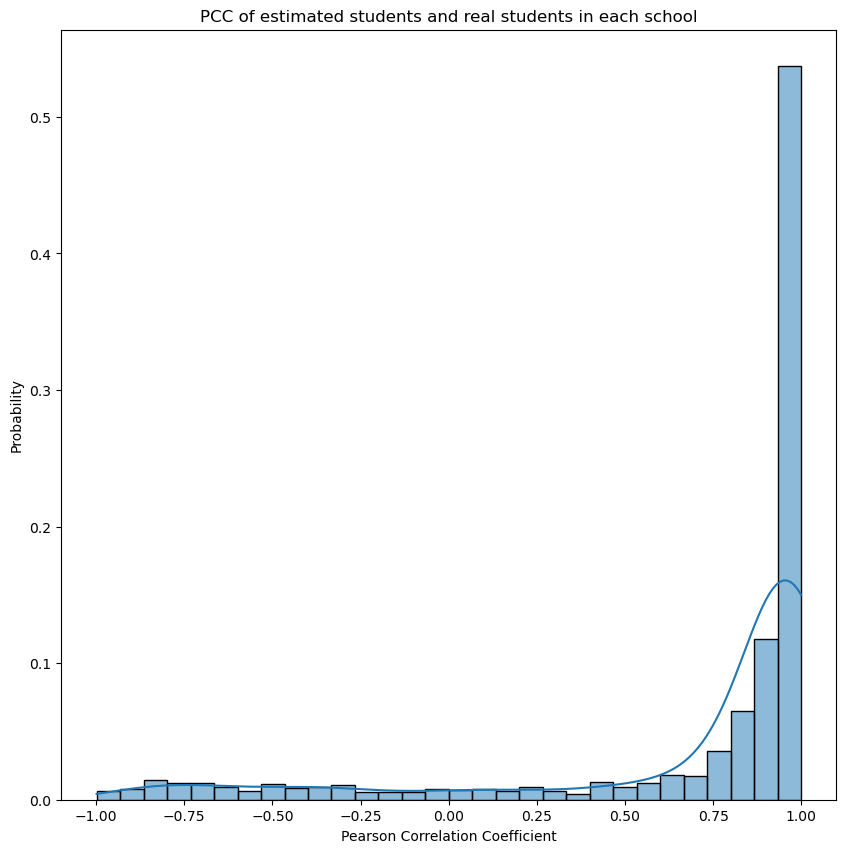

DescribeResult(nobs=2257, minmax=(np.float64(-0.9985502641374245), np.float64(0.9992687540460042)), mean=np.float64(0.6898658565080469), variance=np.float64(0.2735695682172014), skewness=np.float64(-1.907767987873537), kurtosis=np.float64(2.2777794262767683))
Q1: 0.7589259503027461, Q2 (중앙값): 0.9489351866562147, Q3: 0.9975562933630093


In [119]:
from scipy.stats import pearsonr, describe
import seaborn as sns
import matplotlib.pyplot as plt

train_y = np.array(df.iloc[:,12:21])
train_X = np.array(df.iloc[:,21:30])

def rowwise_correlation(A, B):
    """
    각 행별로 Pearson 상관 계수를 계산하여 반환하는 함수
    :param A: (n, m) 크기의 numpy 배열
    :param B: (n, m) 크기의 numpy 배열
    :return: (n,) 크기의 numpy 배열 (각 행의 Pearson 상관 계수)
    """
    return np.array([pearsonr(A[i], B[i])[0] for i in range(A.shape[0])])

data = rowwise_correlation(train_X, train_y)

plt.figure(figsize = (10,10))

sns.histplot(data, bins = 30, kde = True, stat = 'probability')
plt.ylabel('Probability')
plt.xlabel('Pearson Correlation Coefficient')
plt.title('PCC of estimated students and real students in each school')
plt.show()

stats_summary = describe(data[~np.isnan(data)])

print(stats_summary)

from scipy.stats.mstats import mquantiles

# 분위수 계산 (Q1, Q2, Q3)
q1, q2, q3 = mquantiles(data, prob=[0.25, 0.5, 0.95])

print(f"Q1: {q1}, Q2 (중앙값): {q2}, Q3: {q3}")


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_18228\255081026.py:3: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\DSL\EDA\Data/고등학교_데이터셋.csv"
C:\Users\Monet\AppData\Local\Temp\ipykernel_18228\1651628639.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return np.array([pearsonr(A[i], B[i])[0] for i in range(A.shape[0])])


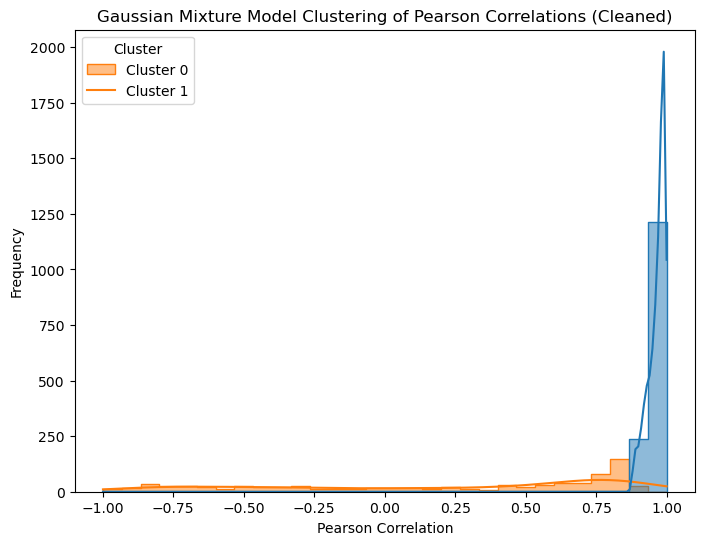

np.float64(0.8792796238247772)

In [130]:
from sklearn.mixture import GaussianMixture

file_path = "D:\DSL\EDA\Data/고등학교_데이터셋.csv"
df = pd.read_csv(file_path, encoding='cp949')

# Extract train_X and train_y as per given indices
train_y = np.array(df.iloc[:, 12:21])  # Columns 12 to 20 (2017-2023 data)
train_X = np.array(df.iloc[:, 21:30])  # Columns 21 to 29 (2015-2024 prediction data)

# Compute row-wise Pearson correlation
data = rowwise_correlation(train_X, train_y)

# Check for NaN values in the data
nan_count = np.isnan(data).sum()

# Remove NaN values before fitting GMM
clean_data = data[~np.isnan(data)]
clean_data_reshaped = clean_data.reshape(-1, 1)

# Apply Gaussian Mixture Model with 2 components on cleaned data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(clean_data_reshaped)
labels = gmm.predict(clean_data_reshaped)

# Create DataFrame for visualization
clean_summary_stats = pd.DataFrame({'Pearson Correlation': clean_data, 'Cluster': labels})

# Plot the histogram with GMM clustering results
plt.figure(figsize=(8, 6))
sns.histplot(data=clean_summary_stats, x="Pearson Correlation", bins=30, kde=True, hue="Cluster", palette="tab10", alpha=0.5, element="step", common_norm=False)
plt.xlabel("Pearson Correlation")
plt.ylabel("Frequency")
plt.title("Gaussian Mixture Model Clustering of Pearson Correlations (Cleaned)")
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1"])
plt.show()

# Find decision boundary again
means = gmm.means_.flatten()
stds = np.sqrt(gmm.covariances_).flatten()

x_vals = np.linspace(min(clean_data), max(clean_data), 1000)
prob_cluster_0 = gmm.weights_[0] * np.exp(-0.5 * ((x_vals - means[0]) / stds[0])**2) / (stds[0] * np.sqrt(2 * np.pi))
prob_cluster_1 = gmm.weights_[1] * np.exp(-0.5 * ((x_vals - means[1]) / stds[1])**2) / (stds[1] * np.sqrt(2 * np.pi))

# Find the intersection point
intersection_index = np.argmin(np.abs(prob_cluster_0 - prob_cluster_1))
decision_boundary = x_vals[intersection_index]

# Display the new decision boundary
decision_boundary
